In [4]:
from surprise import Dataset

data = Dataset.load_builtin('ml-100k', prompt=False)
data

In [5]:
times = { 
    "SVD++": {
        "byRegAll": {"times": [], "rmse": [], "mae": []},
        "byLrAll": {"times": [], "rmse": [], "mae": []}
    }, 
    "funkSVD": {
        "byRegAll": {"times": [], "rmse": [], "mae": []}, 
        "byLrAll": {"times": [], "rmse": [], "mae": []}
    } 
}

import numpy as np

lrs = np.arange(0.001, 0.03, 0.001)
regs = np.arange(0.001, 0.03, 0.001)

In [6]:
from surprise import SVD, SVDpp
from surprise.model_selection import cross_validate

def getMean(tup):
    return (tup[0] + tup[1] + tup[2]) / 3

print("doing regs")
for reg in regs:
    svdPp = SVDpp(cache_ratings=True, reg_all=reg)

    res = cross_validate(svdPp, data, measures=['RMSE', 'MAE'], cv=3)

    times["SVD++"]["byRegAll"]["times"].append(getMean(res["fit_time"]))
    times["SVD++"]["byRegAll"]["rmse"].append(getMean(res["test_rmse"]))
    times["SVD++"]["byRegAll"]["mae"].append(getMean(res["test_mae"]))


    funkSvd = SVD(reg_all=reg)

    res = cross_validate(funkSvd, data, measures=['RMSE', 'MAE'], cv=3)

    times["funkSVD"]["byRegAll"]["times"].append(getMean(res["fit_time"]))
    times["funkSVD"]["byRegAll"]["rmse"].append(getMean(res["test_rmse"]))
    times["funkSVD"]["byRegAll"]["mae"].append(getMean(res["test_mae"]))

print("doing lrs")
for lr in lrs:
    svdPp = SVDpp(cache_ratings=True, lr_all=lr)

    res = cross_validate(svdPp, data, measures=['RMSE', 'MAE'], cv=3)

    times["SVD++"]["byLrAll"]["times"].append(getMean(res["fit_time"]))
    times["SVD++"]["byLrAll"]["rmse"].append(getMean(res["test_rmse"]))
    times["SVD++"]["byLrAll"]["mae"].append(getMean(res["test_mae"]))


    funkSvd = SVD(lr_all=lr)

    res = cross_validate(funkSvd, data, measures=['RMSE', 'MAE'], cv=3)

    times["funkSVD"]["byLrAll"]["times"].append(getMean(res["fit_time"]))
    times["funkSVD"]["byLrAll"]["rmse"].append(getMean(res["test_rmse"]))
    times["funkSVD"]["byLrAll"]["mae"].append(getMean(res["test_mae"]))

doing regs
doing lrs


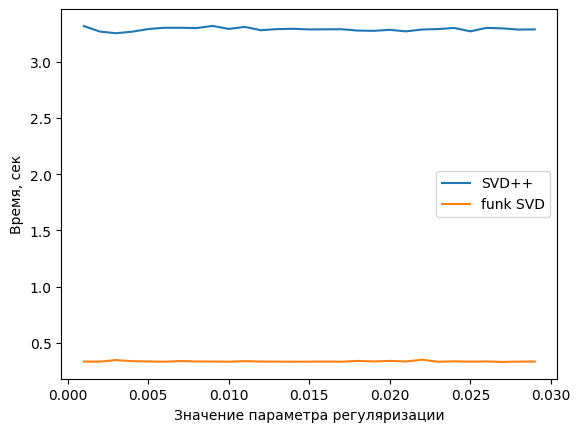

In [15]:
import matplotlib.pyplot as plt

plt.plot(regs, times["SVD++"]["byRegAll"]["times"], label="SVD++")
plt.plot(regs, times["funkSVD"]["byRegAll"]["times"], label="funk SVD")

plt.legend()
plt.ylabel("Время, сек")
plt.xlabel("Значение параметра регуляризации")
plt.show()

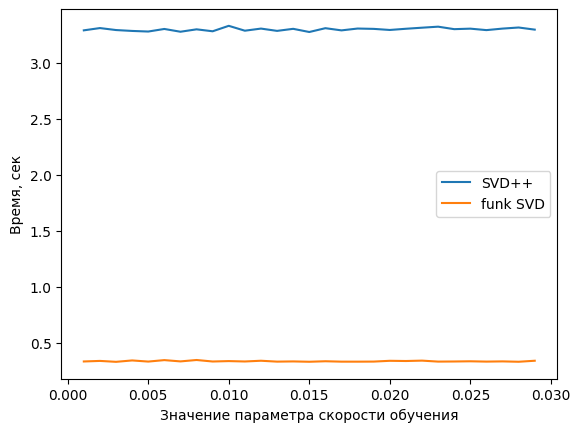

In [20]:
import matplotlib.pyplot as plt

plt.plot(regs, times["SVD++"]["byLrAll"]["times"], label="SVD++")
plt.plot(regs, times["funkSVD"]["byLrAll"]["times"], label="funk SVD")

plt.legend()
plt.ylabel("Время, сек")
plt.xlabel("Значение параметра скорости обучения")
plt.show()

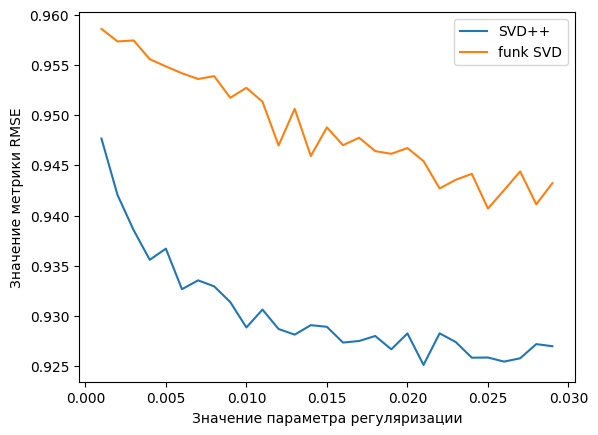

In [16]:
import matplotlib.pyplot as plt

plt.plot(regs, times["SVD++"]["byRegAll"]["rmse"], label="SVD++")
plt.plot(regs, times["funkSVD"]["byRegAll"]["rmse"], label="funk SVD")

plt.legend()
plt.ylabel("Значение метрики RMSE")
plt.xlabel("Значение параметра регуляризации")
plt.show()

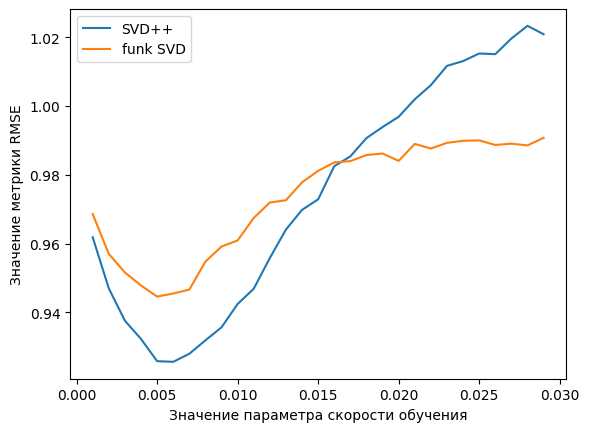

In [21]:
import matplotlib.pyplot as plt

plt.plot(regs, times["SVD++"]["byLrAll"]["rmse"], label="SVD++")
plt.plot(regs, times["funkSVD"]["byLrAll"]["rmse"], label="funk SVD")

plt.legend()
plt.ylabel("Значение метрики RMSE")
plt.xlabel("Значение параметра скорости обучения")
plt.show()

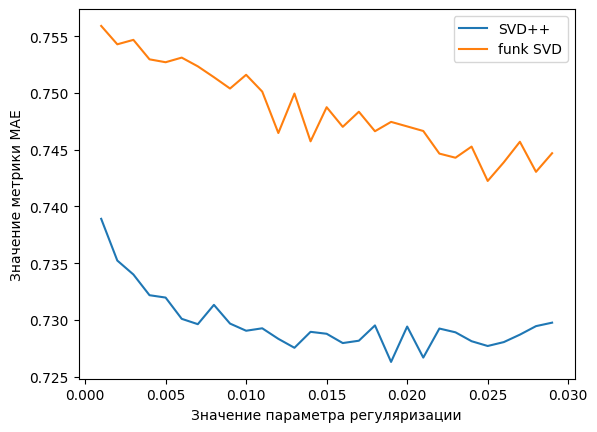

In [11]:
import matplotlib.pyplot as plt

plt.plot(regs, times["SVD++"]["byRegAll"]["mae"], label="SVD++")
plt.plot(regs, times["funkSVD"]["byRegAll"]["mae"], label="funk SVD")

plt.legend()
plt.ylabel("Значение метрики MAE")
plt.xlabel("Значение параметра регуляризации")
plt.show()

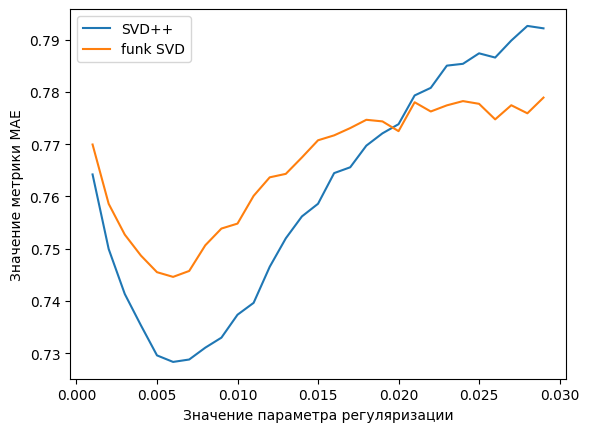

In [22]:

import matplotlib.pyplot as plt

plt.plot(regs, times["SVD++"]["byLrAll"]["mae"], label="SVD++")
plt.plot(regs, times["funkSVD"]["byLrAll"]["mae"], label="funk SVD")

plt.legend()
plt.ylabel("Значение метрики MAE")
plt.xlabel("Значение параметра скорости обучения")
plt.show()